In [1]:
import sqlite3

In [2]:
conn = sqlite3.connect('attr_data.db')

In [3]:
cursor = conn.cursor()

In [4]:
import pandas as pd
attr_data = pd.read_sql_query('''select * from attrition_records''', conn)

In [5]:
df= pd.DataFrame(attr_data)
df.to_csv('attr_data.csv', index =False)

In [6]:
attrition_data =pd.read_csv('attr_data.csv')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#To view the table, top 5 rows
attrition_data.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [9]:
#view data types, and columns with null values

attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [10]:
#to view the basic statistical details

attrition_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#What do you think are the 3 factors behind employee attrition?

#Age - highly correlates with total working years 
#Monthly Income - also highly correlates with totalworkingyears
#Promotion

'''There is a strong correlation between age, monthly income, years in current role and totalworking year. This means an employee
needs to stay for a long time in the company before they get a pay raise or be promoted''' 

attrition_data.corr()

C:\Users\RELIANCEHMO\AppData\Local\Temp\ipykernel_10688\2593980274.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  attrition_data.corr()


,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,...,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [12]:
#What is the relationship between Education and Monthly Income?

print(attrition_data['Education'].corr(attrition_data['MonthlyIncome']))

'''There is no strong relationship between education and monthly income. 
This means we can't predict the monthly income by looking at the employee's education level'''

0.09496067704188889


"There is no strong relationship between education and monthly income. \nThis means we can't predict the monthly income by looking at the employee's education level"

In [13]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')

attrition_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

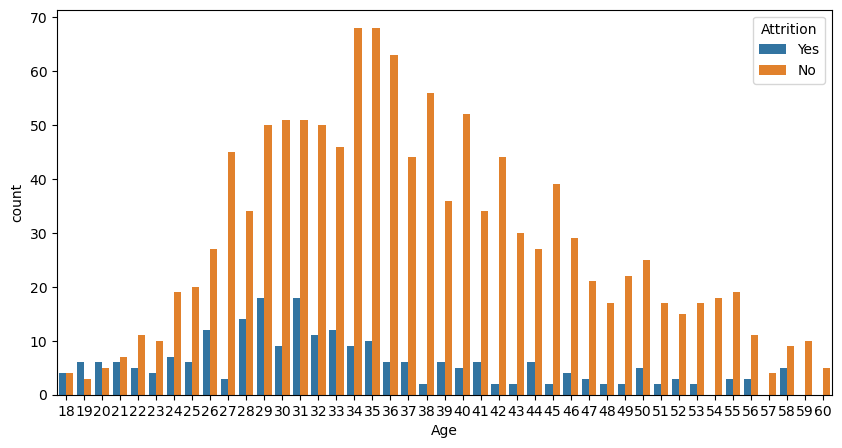

In [14]:
#What is the effect of age on attrition?

plt.figure(figsize=(10, 5))
sns.countplot(x='Age', hue='Attrition', data=attrition_data)
plt.show();

#majority of age of 29 and 31 left the company.The employee attrition rates are higher among employees aged less than 35

C:\Users\RELIANCEHMO\AppData\Local\Temp\ipykernel_10688\2274738836.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 6))


'Yes it is. The number of leavers is more with employees who have a low percentsalaryhike.Also, as seen in Out [11], employee\nneeds to stay for a long time in the company before they get a pay raise or be promoted'

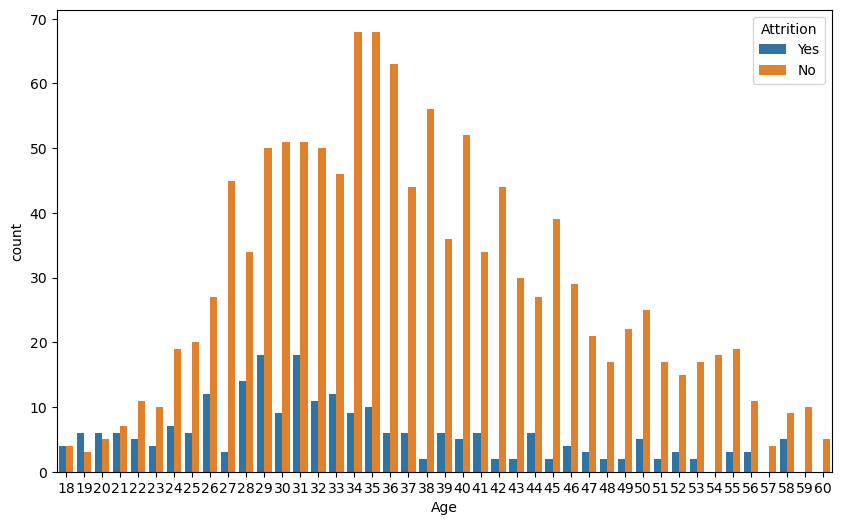

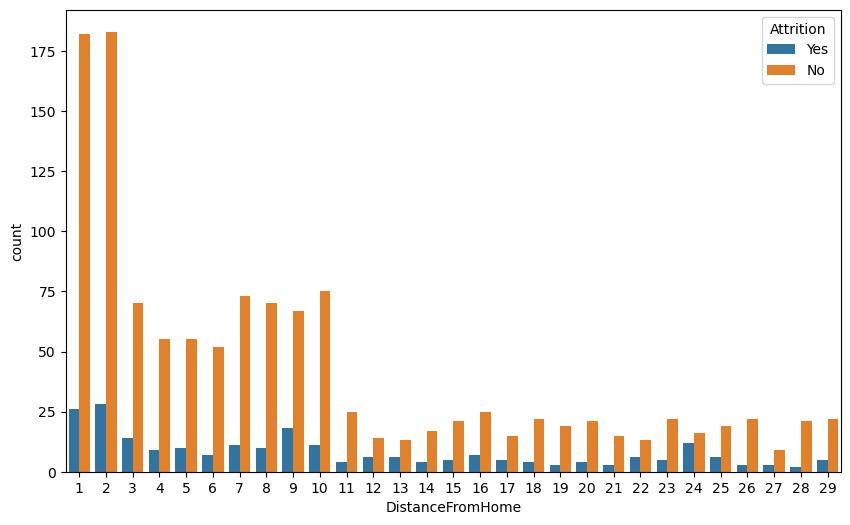

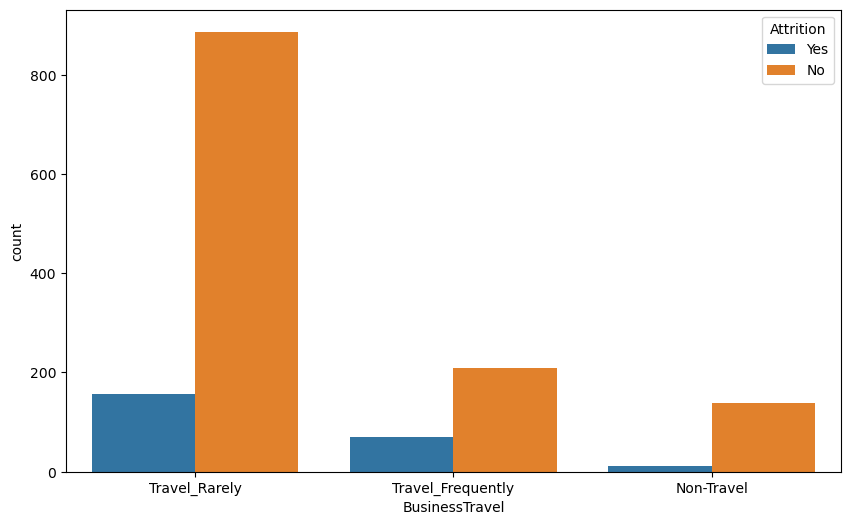

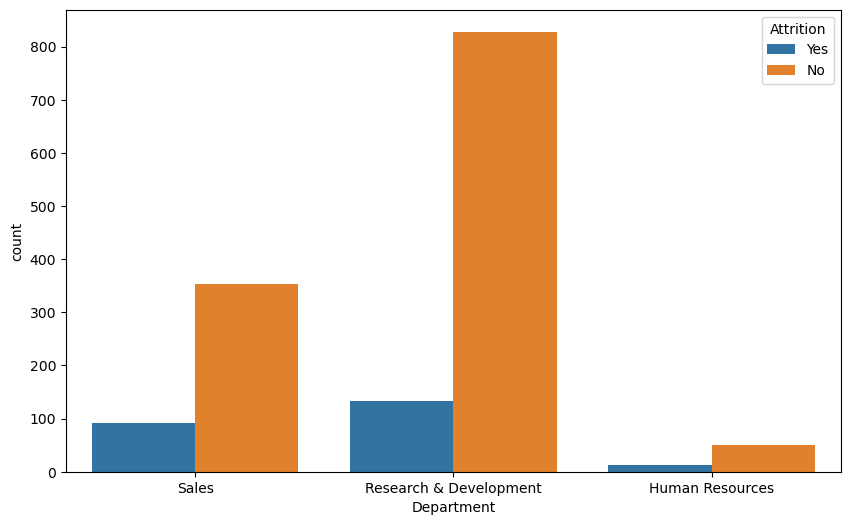

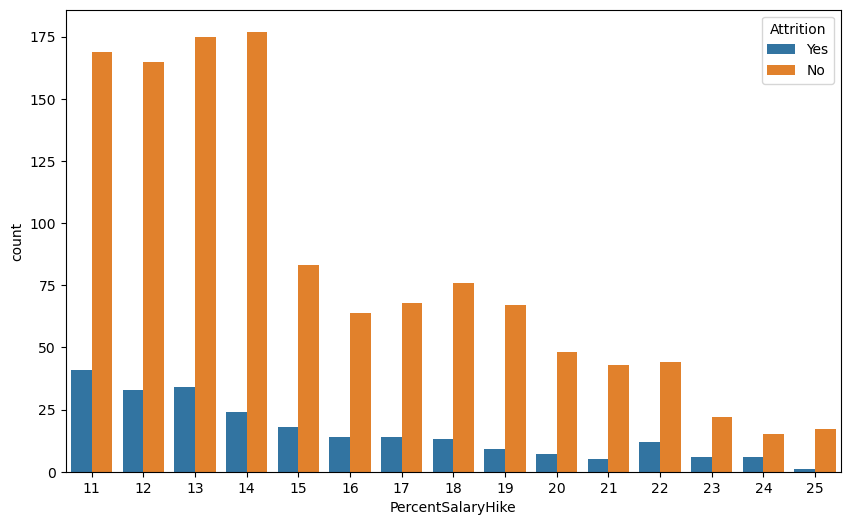

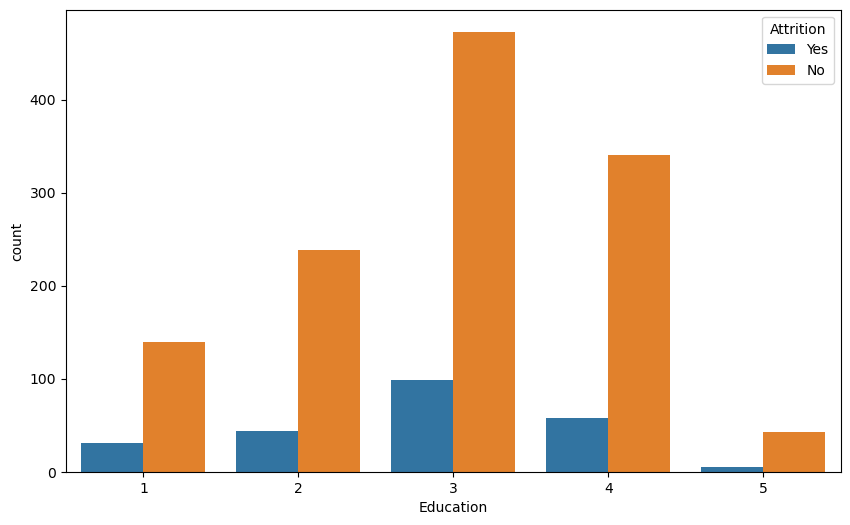

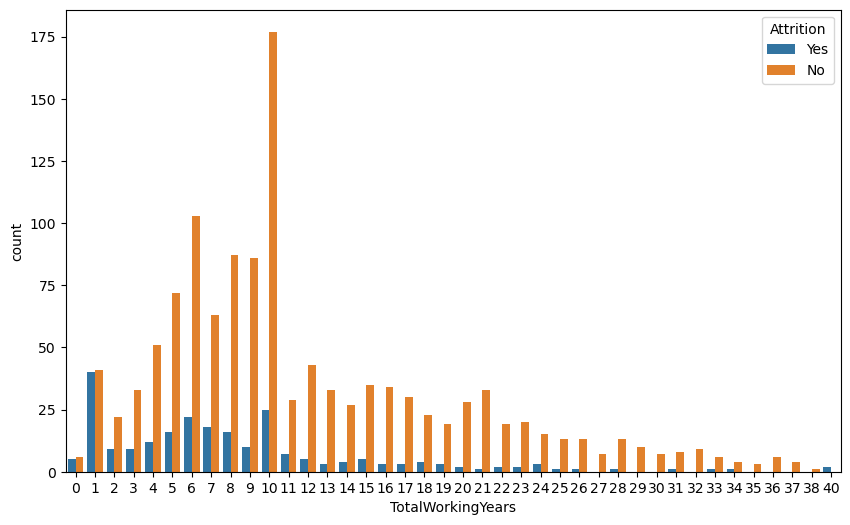

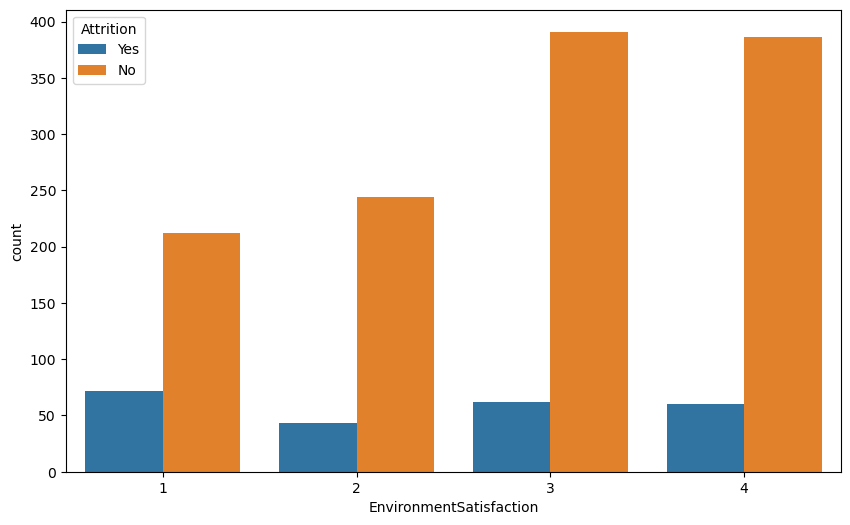

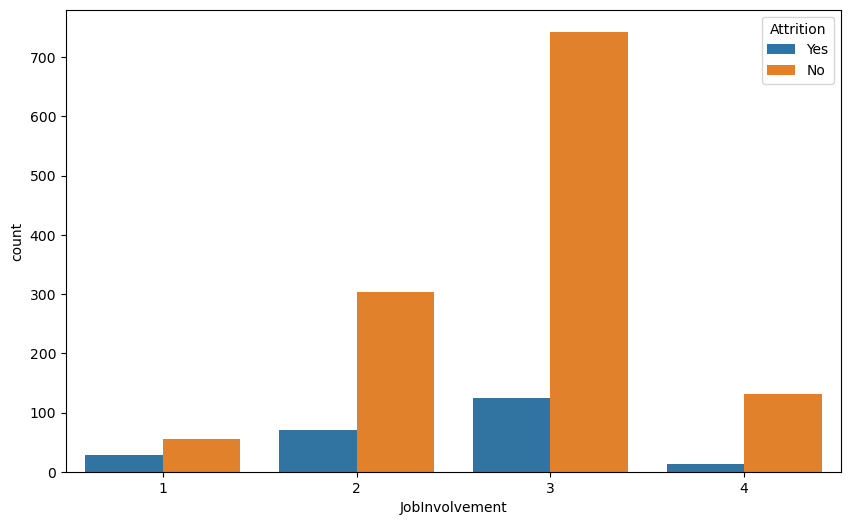

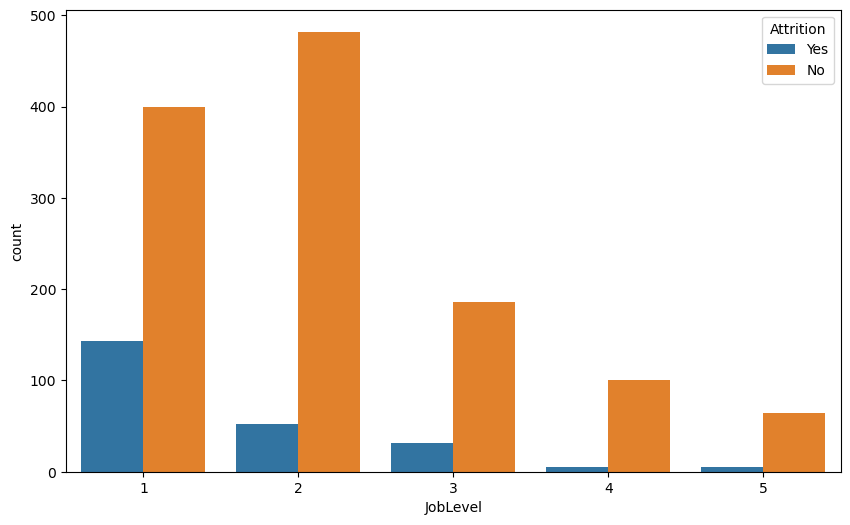

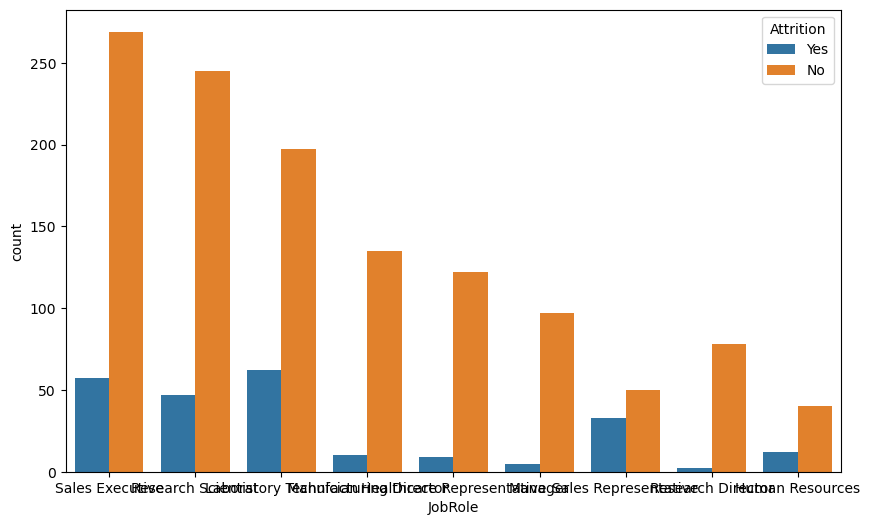

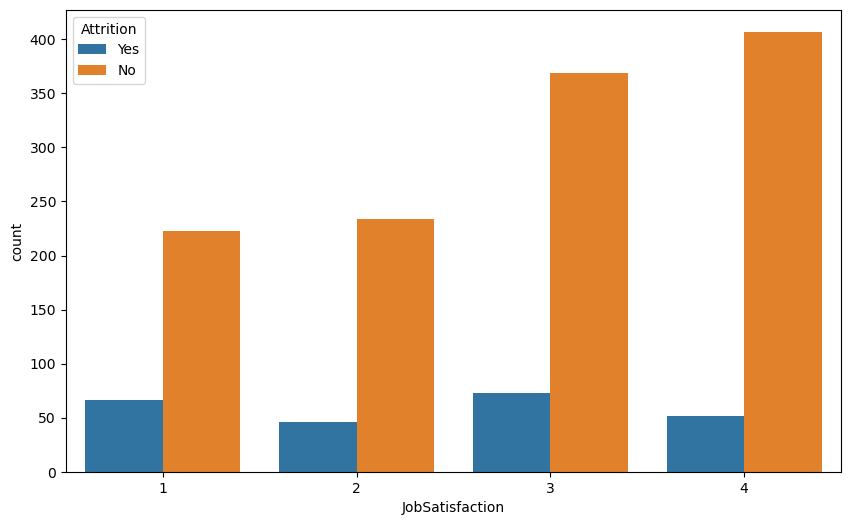

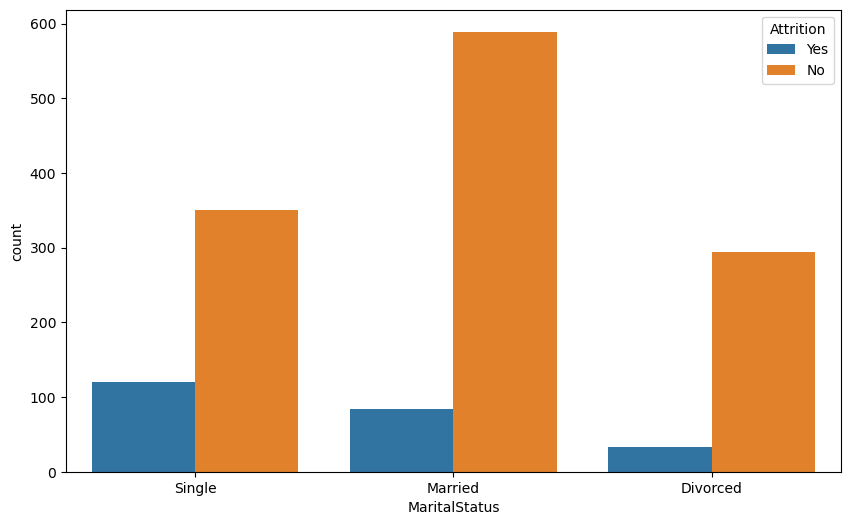

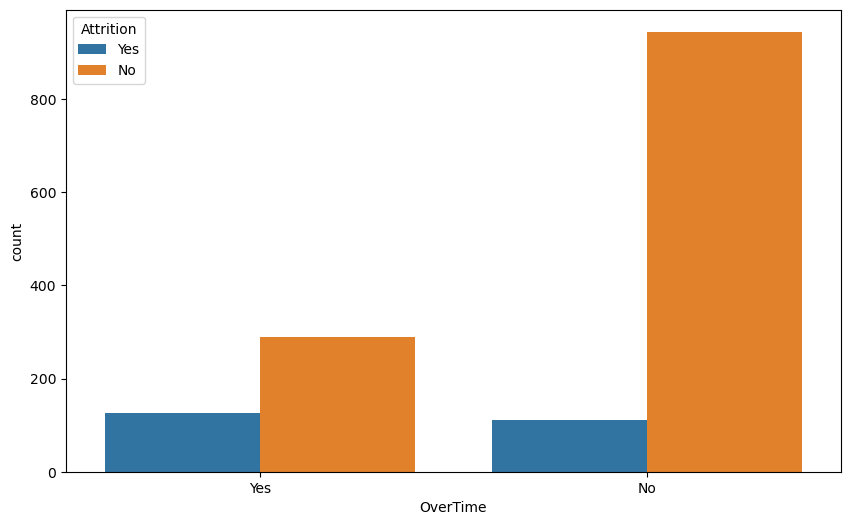

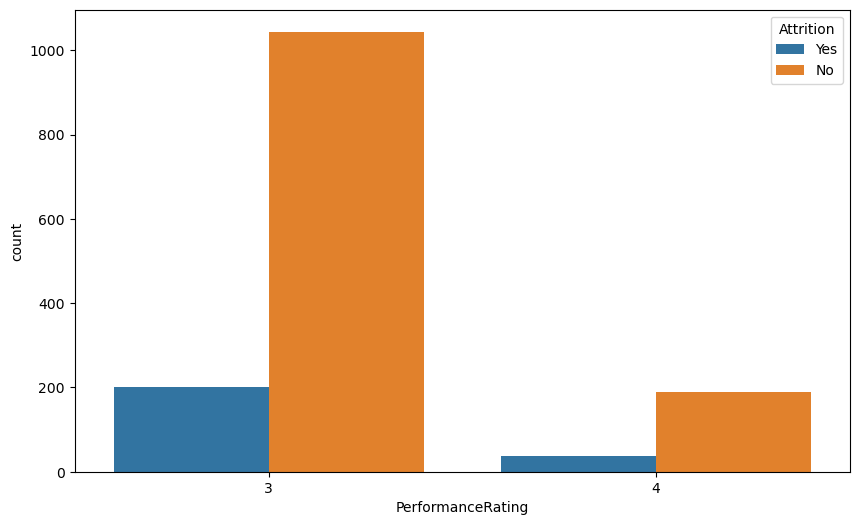

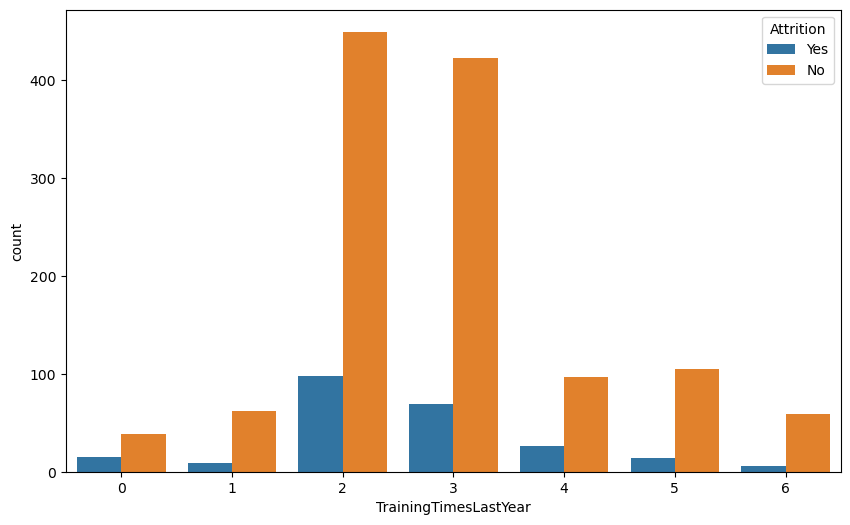

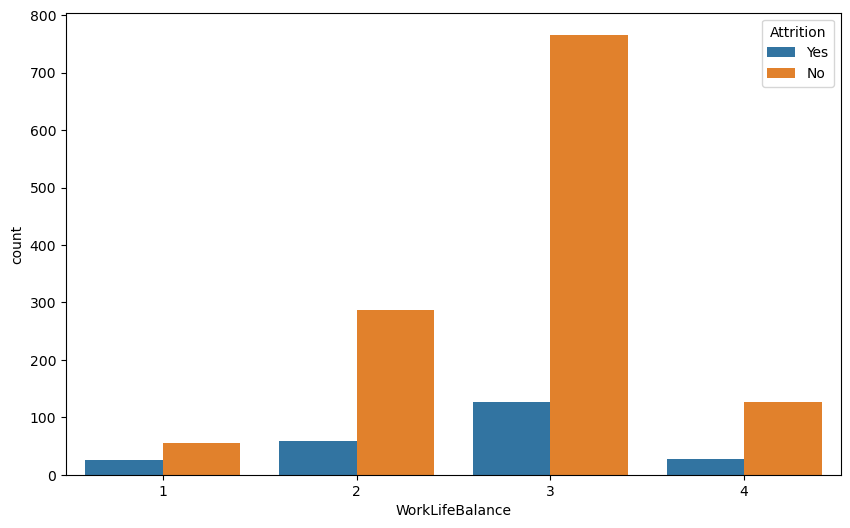

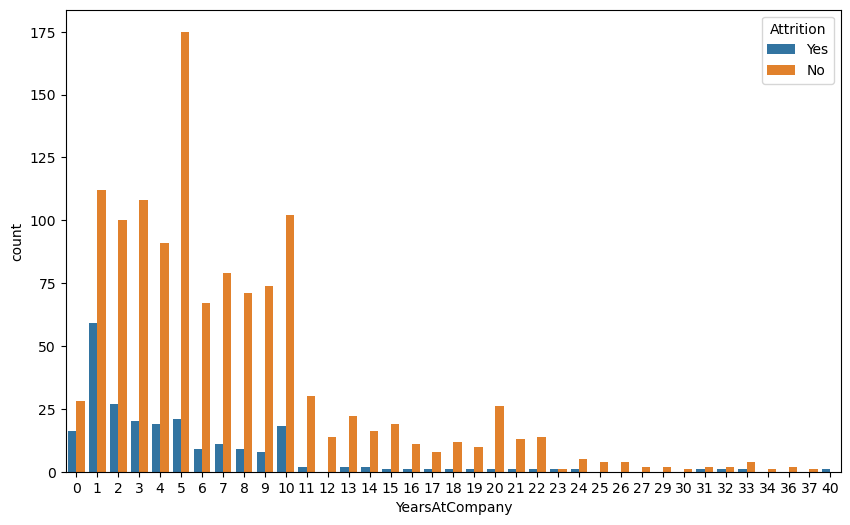

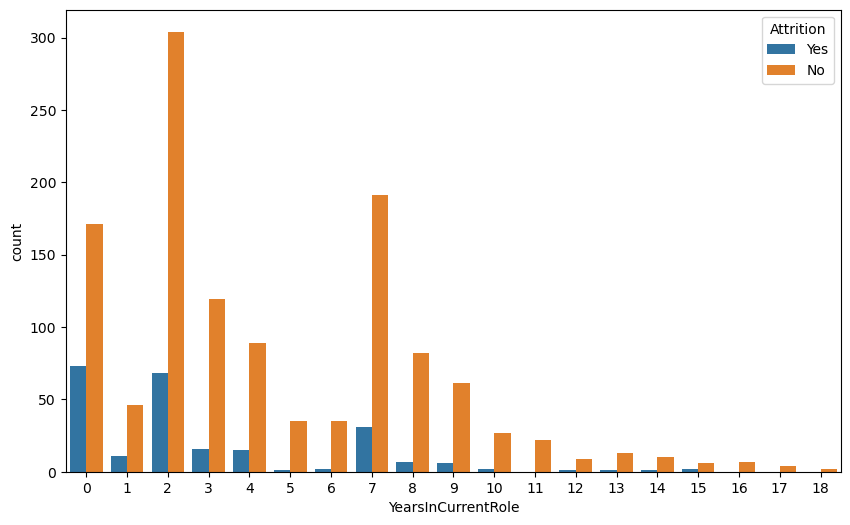

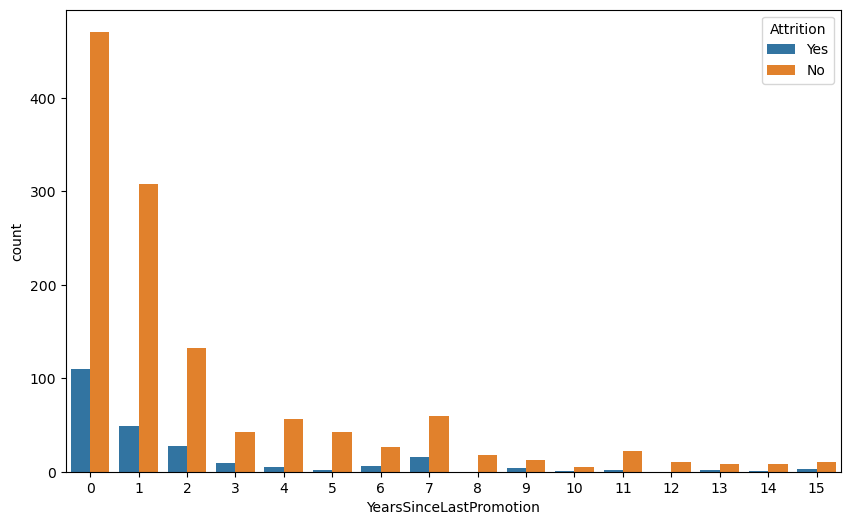

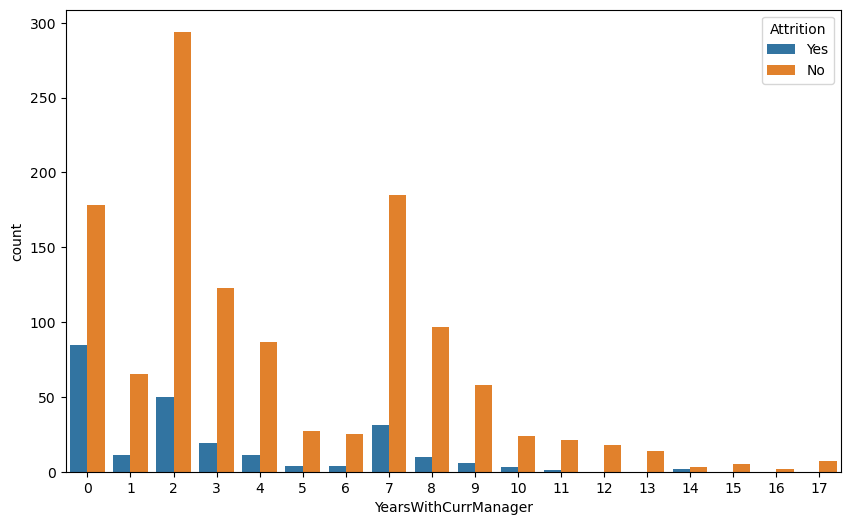

In [17]:
##Is Income the main factor towards employee attrition?

categorcial_features = ['Age', 'DistanceFromHome','BusinessTravel','Department','PercentSalaryHike','Education','TotalWorkingYears',
                        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                        'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 
                        'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

for category in categorcial_features:
    plt.figure(figsize = (10, 6))
    sns.countplot(x = category, data = attrition_data, hue = 'Attrition')
    
'''Yes it is. The number of leavers is more with employees who have a low percentsalaryhike.Also, as seen in Out [11], employee
needs to stay for a long time in the company before they get a pay raise or be promoted'''


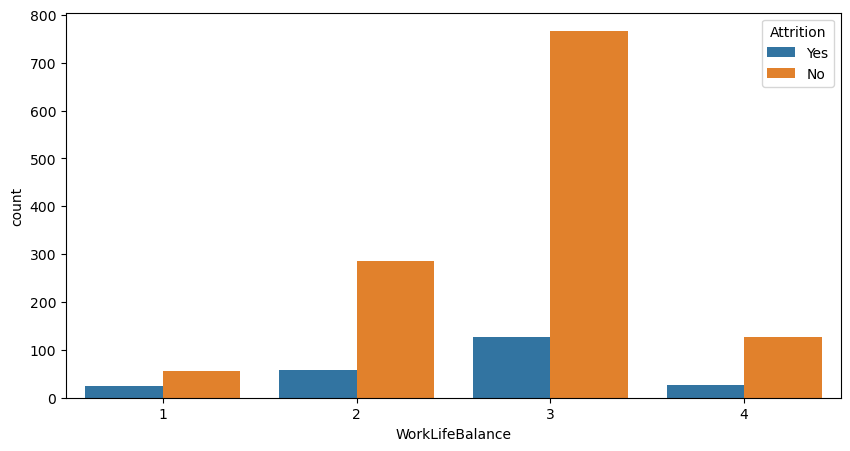

'Employees with an assigned WorkLifeBalance of "1" show the largest proportion of Leavers.\nResult shows that a great work life balance reduces the attrition rate of employees'

In [19]:
#How does work-life balance impact the overall attrition rate?

plt.figure(figsize=(10, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=attrition_data)
plt.show();

attrition_data['WorkLifeBalance'].value_counts()

'''Employees with an assigned WorkLifeBalance of "1" show the largest proportion of Leavers.
Result shows that a great work life balance reduces the attrition rate of employees'''